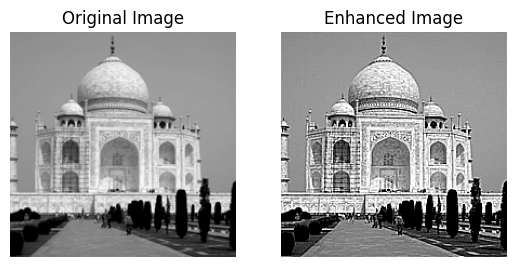

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Lab2.png', cv2.IMREAD_GRAYSCALE)
img_float = np.float32(img)
laplacian_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]], dtype=np.float32)
# Apply Laplacian filter using convolution
laplacian = cv2.filter2D(img_float, -1, laplacian_kernel)
# Normalize laplacian to range [-1, 1]
laplacian_norm = laplacian / laplacian.max()
# Enhance image by adding scaled Laplacian
alpha = 1.0
enhanced_img = img_float + alpha * laplacian_norm * 255
# Clip values to valid range [0,255] and convert to uint8
enhanced_img = np.clip(enhanced_img, 0, 255).astype(np.uint8)
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Enhanced Image')
plt.imshow(enhanced_img, cmap='gray')
plt.axis('off')
plt.show()

array([[[201, 151, 121],
        [194, 144, 114],
        [192, 142, 112],
        ...,
        [203, 148, 115],
        [200, 146, 113],
        [207, 154, 121]],

       [[194, 143, 113],
        [183, 133, 103],
        [184, 135, 105],
        ...,
        [195, 140, 107],
        [197, 139, 106],
        [200, 147, 114]],

       [[194, 144, 114],
        [184, 134, 104],
        [185, 135, 105],
        ...,
        [196, 141, 108],
        [194, 140, 107],
        [197, 144, 111]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 53, 102,  85],
        [ 57, 108,  92],
        [ 75, 122, 116]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,  19,   2],
        [  0,  15,   0],
        [  0,  25,  15]],

       [[ 47,  94,  78],
        [ 50,  97,  84],
        [ 55, 101,  89],
        ...,
        [ 25,  63,  46],
        [ 28,  69,  54],
        [ 29,  73,  64]]], dtype=uint8)
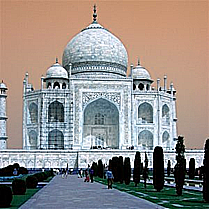

In [3]:
import cv2
import numpy as np

img = cv2.imread('Lab2.png')
img_float = np.float32(img)
enhanced = np.zeros_like(img_float)
laplacian_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]], dtype=np.float32)
alpha = 1.0
# Lặp qua từng kênh màu
for c in range(3):
    channel = img_float[:,:,c]
    lap = cv2.filter2D(channel, -1, laplacian_kernel)
    lap_norm = lap / (np.max(np.abs(lap)) + 1e-8)
    enhanced[:,:,c] = channel + alpha * lap_norm * 255
# Đảm bảo giá trị hợp lệ
enhanced = np.clip(enhanced, 0, 255).astype(np.uint8)
enhanced

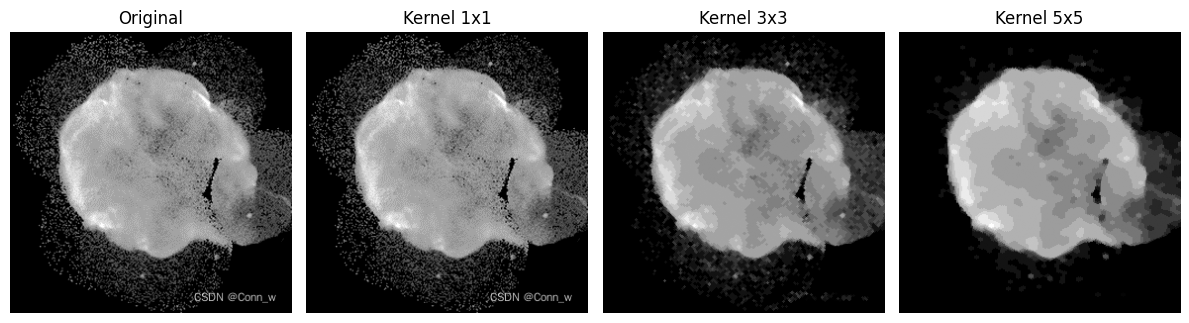

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/cygnus.png', cv2.IMREAD_GRAYSCALE)
# Danh sách kernel cần thử
kernel_sizes = [(1, 1), (3, 3), (5, 5)]
results = []
# Thực hiện opening + closing với từng kernel
for size in kernel_sizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, size)
    opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
    results.append((f"{size[0]}x{size[1]}", closed))
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")
for i, (label, output) in enumerate(results):
    plt.subplot(1, 4, i+2)
    plt.imshow(output, cmap='gray')
    plt.title(f"Kernel {label}")
    plt.axis("off")
plt.tight_layout()
plt.show()

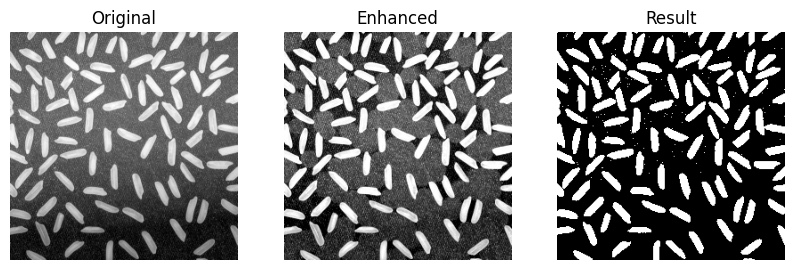

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)
# Define structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17, 17))
# Top-hat transformation
top_hat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
# Bottom-hat transformation
bottom_hat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
enhanced = cv2.add(img, top_hat)
enhanced = cv2.subtract(enhanced, bottom_hat)
# Threshold the enhanced image (Otsu's method)
_, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.title('Original'), plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(1,3,2), plt.title('Enhanced'), plt.imshow(enhanced, cmap='gray'), plt.axis('off')
plt.subplot(1,3,3), plt.title('Result'), plt.imshow(binary, cmap='gray'), plt.axis('off')
plt.show()

array([[ 0, 29, 26, ..., 12, 13, 21],
       [22, 22, 19, ...,  8, 20, 20],
       [24, 14, 18, ..., 17, 18, 10],
       ...,
       [16,  9, 21, ...,  4, 18, 12],
       [15, 15, 14, ...,  2, 15, 13],
       [ 8, 16, 15, ...,  2, 21, 25]], dtype=uint8)
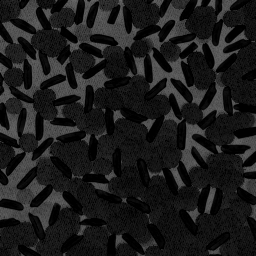

In [29]:
bottom_hat

array([[40, 10, 13, ..., 10, 10,  5],
       [15, 15, 18, ..., 14,  3,  6],
       [13, 23, 19, ...,  5,  5, 16],
       ...,
       [11, 18,  6, ..., 18,  4, 10],
       [12, 12, 13, ..., 23,  9,  9],
       [19, 11, 12, ..., 23,  4,  0]], dtype=uint8)
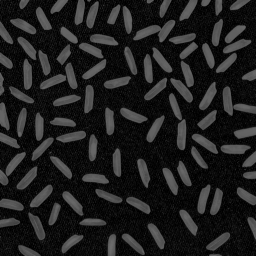

In [30]:
top_hat